# Implementing K-Means Algorithm without any external packages
As per the requirements of the given assignment problems, no external packages will be used to implement kmeans algorithm. Only simple Python lists and classes will be used to store and manipulate the data.

## My Approach
- There will be a `Datapoint` class whose attribute `dims` will store the coordinates of the datapoint in a list. So eventually we will have a list of Datapoint objects as our loaded data from iris.data file.
- The first k datapoints will be selected as centroids. Centroids is nothing but a list of Datapoint objects.
- The squared euclidean distances will be calculated on the go and eventually the Datapoint will be assigned a cluster.
- The assignment will be stored in a separate list called Cluster Tags.
- Eventually, the centroids will be updated and we will check whether they match with the old ones.
- If they match, the algorithm stops. Else the iterations continue.
- Then we will find the optimal value of k by elbow method by running kmeans from k = 2 to k = 10 and finding the WCSS and plotting it on a graph.
- After that, we will run kmeans with optimal value of k, record the centroids, cluster assignments.
- Then we shall produce the output both in text form and nice 3D scatter plot.

## Step 1: Creating a `Datapoint` class
- Since every datapoint can have multiple features(coordinates or dimensions), we will create a dedicated `Datapoint` class for the data points for easy handling of data.
- The attribute of `Datapoint` class, `dims`, is a list of coordinates(or features) of a single data point.
- Other class methods are created to calculate the squared euclidian distance between two points, adding two points, dividing the point by some scalar quantity as these operations are often required in K-Means Algorithm.

In [89]:
from typing import List

class Datapoint:
    def __init__(self, dims: List[float]):
        self.dims = dims
    
    def __repr__(self):
        return f"Pt{self.dims}"

    def dis(self, other):
        dis = 0.0
        for i in range(len(self.dims)):
            dis += (self.dims[i] - other.dims[i])**2  # squared euclidean distance
        return dis

    def __add__(self, other):
        """
        Will be used during updation of centroids in finding the average of all points
        """
        new_dims = []
        for i in range(len(self.dims)):
            new_dims.append(self.dims[i] + other.dims[i])
        return Datapoint(new_dims)

    def __truediv__(self, scalar: int):
        """
        Will be used during updation of centroids in finding the average of all points
        """
        new_dims = []
        for i in range(len(self.dims)):
            new_dims.append(self.dims[i] / scalar)
        return Datapoint(new_dims)
        
    def __eq__(self, other):
        return self.dims == other.dims

## Step 2: Loading the dataset
- We will load our data from a csv file where each row is an individual data point
- So eventually, we will have a list of `Datapoint` objects

In [90]:
import csv

def load_data(FILE_PATH: str):
    data = []
    with open(FILE_PATH, 'r') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            if row: # making sure row is not empty
                data.append(Datapoint([float(val) for val in row[:-1]]))
    return data
print(load_data("iris/iris.data")[:7]) # Printing a few datapoints from data

[Pt[5.1, 3.5, 1.4, 0.2], Pt[4.9, 3.0, 1.4, 0.2], Pt[4.7, 3.2, 1.3, 0.2], Pt[4.6, 3.1, 1.5, 0.2], Pt[5.0, 3.6, 1.4, 0.2], Pt[5.4, 3.9, 1.7, 0.4], Pt[4.6, 3.4, 1.4, 0.3]]


As you can see, we have now successfully loaded our data in `data` list.

## Step 3: Implementing K-Means Algorithm

In [91]:
def kmeans(data: List[Datapoint], k: int):
    import random
    # Randomly initialize the centroids
    centroids: List[Datapoint] = random.sample(data, k)

    # This list will contains the assignment(tags) of every Datapoint to which cluster it belongs
    # the cluster number will be nothing but the index of the centroid(of that cluster) in the centroids list
    cluster_tags = [None]*len(data)

    # iteration begins and will continue until we get equal centroids
    while True:
        for i in range(len(data)):
            pt = data[i]
            min_dis = float('inf')
    
            #calculating distance of pt with every centroid and eventually finding the closest one
            for j in range(len(centroids)):
                dis = pt.dis(centroids[j])
                if dis < min_dis:
                    min_dis = dis
                    cluster_tags[i] = j
    
        # updating the centroids after assigning cluster tag to each Datapoint
        # creating a new list of centroids with all datapoints having dims initially 0
        new_centroids: List[Datapoint] = [Datapoint([0]*len(data[0].dims)) for _ in range(k)]
        counts = [0]*k # to store count of Datapoints in each cluster
    
        for i in range(len(data)):
            tag = cluster_tags[i]
            new_centroids[tag] = new_centroids[tag] + data[i] # adding the datapoints together to eventually find the average
            counts[tag] += 1
        for i in range(len(new_centroids)):
            if counts[i] > 0:
                new_centroids[i] = new_centroids[i] / counts[i]
        if new_centroids == centroids:
            break
        else:
            centroids = new_centroids
            
    return centroids, cluster_tags, counts
    

## Step 4: Finding optimal value of k
- We shall first calculate the within cluster sum of squares for clusters for every k
- Then we will plot the wcss for every k from 2 to 10
- We shall plot the data using the `matplotlib` package
- Then we shall find the optimal value of k

In [92]:
def wcss(data: List[Datapoint], centroids: List[Datapoint], cluster_tags: List[int]):
    WCSS = 0.0
    for i in range(len(data)):
        pt = data[i]
        cluster_num = cluster_tags[i] 
        WCSS += pt.dis(centroids[cluster_num])
    return WCSS

For k = 2, WCSS = 152.37
For k = 3, WCSS = 78.94
For k = 4, WCSS = 71.34
For k = 5, WCSS = 49.88
For k = 6, WCSS = 47.66
For k = 7, WCSS = 34.99
For k = 8, WCSS = 33.65
For k = 9, WCSS = 35.05
For k = 10, WCSS = 27.25


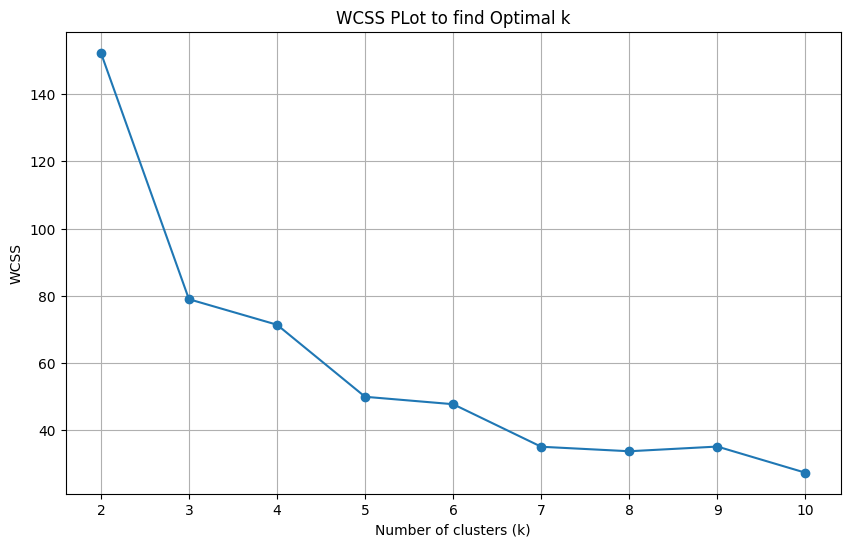

In [95]:
import matplotlib.pyplot as plt

def elbow_method(data: List[Datapoint], max_k: int):
    wcss_list = []
    for k in range(2, max_k+1):
        centroids, cluster_tags, _ = kmeans(data, k)
        WCSS = wcss(data, centroids, cluster_tags)
        wcss_list.append(WCSS)
        print(f"For k = {k}, WCSS = {WCSS:.2f}")
    
    # Plotting the elbow graph
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_k + 1), wcss_list, marker='o')
    plt.title('WCSS PLot to find Optimal k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('WCSS')
    plt.xticks(range(2, max_k + 1))
    plt.grid()
    plt.show()
elbow_method(data, 10)

As we see, the highest decrease in WCSS occurs when we move from k = 2 to k = 3. And then WCSS decreases at a very low rate. <br>
**So k=3 is the optimal value by the elbow method.**

#### Seeing the crude output of K-Means Algorithm for optimal value k=3

In [97]:
data = load_data("iris/iris.data")
k = 3
centroids, cluster_tags, counts = kmeans(data, k)
for i in range(len(centroids)):
    print(f"The centroid of cluster {i} is {centroids[i]}")
    print(f"Number of datapoints = {counts[i]}")

The centroid of cluster 0 is Pt[5.005999999999999, 3.4180000000000006, 1.464, 0.2439999999999999]
Number of datapoints = 50
The centroid of cluster 1 is Pt[5.88360655737705, 2.740983606557377, 4.388524590163935, 1.4344262295081966]
Number of datapoints = 61
The centroid of cluster 2 is Pt[6.853846153846153, 3.0769230769230766, 5.715384615384615, 2.053846153846153]
Number of datapoints = 39


## Step 5: Visualization of Clusters
- As we can see, we are printing the output in a very crude way.
- Let us visualise the cluster data as a 3D scatter plot.
- Since there are 4 attributes, we can pick 3 attributes out of 4 in 4C3 ways, i.e., 4 ways. So there will be 4 scatter plots. 

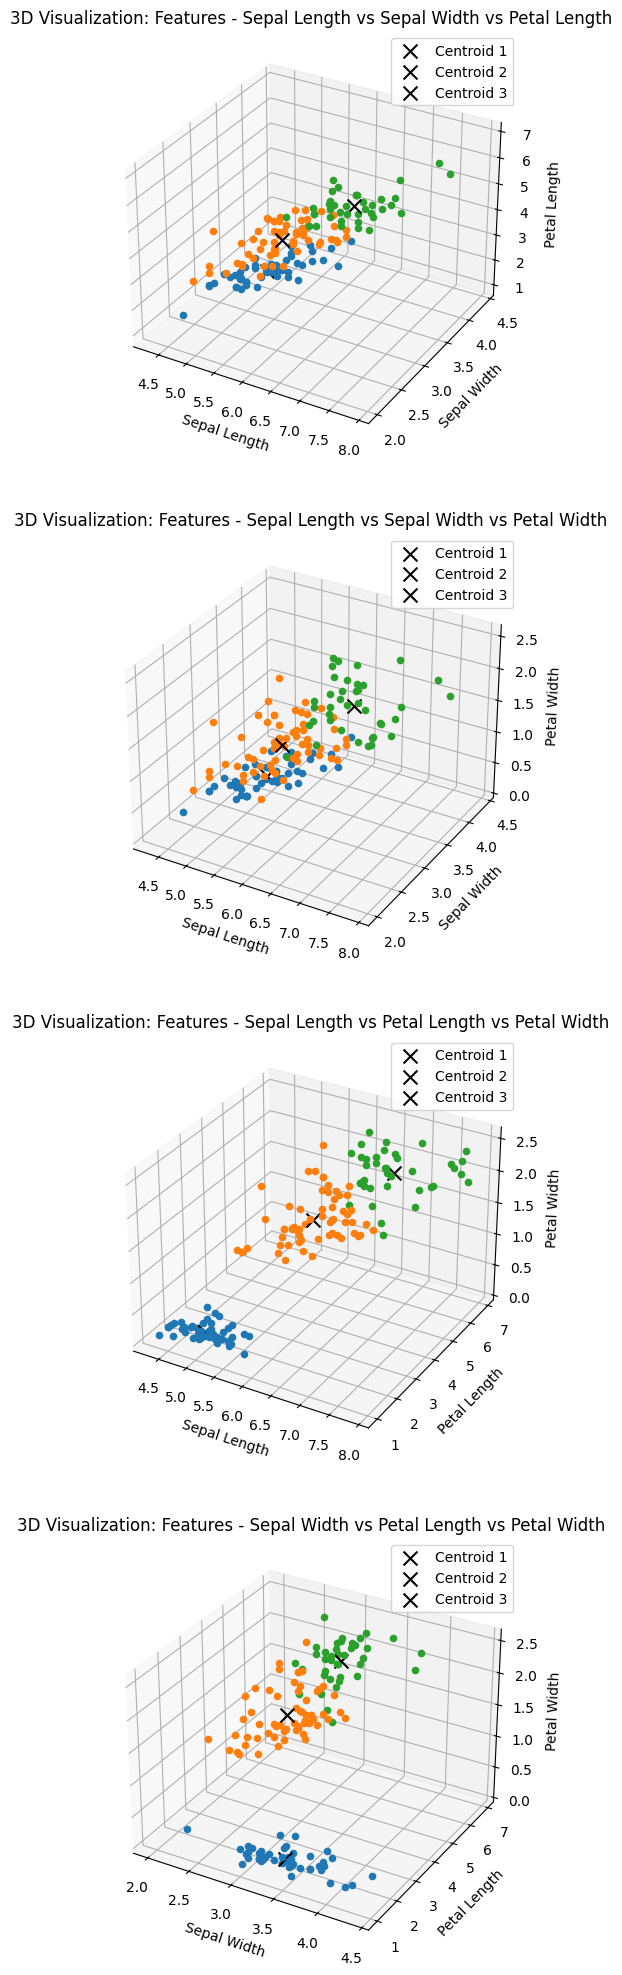

In [102]:
from mpl_toolkits.mplot3d import Axes3D

def visualize(data: List[Datapoint], centroids: List[Datapoint], cluster_tags: List[int]):
    # Feature combinations: (feature indices)
    feature_combinations = [
        (0, 1, 2),  # Sepal Length, Sepal Width, Petal Length
        (0, 1, 3),  # Sepal Length, Sepal Width, Petal Width
        (0, 2, 3),  # and so on...
        (1, 2, 3)   
    ]
    
    # Create a figure for 4 scatter plots (4 rows, 1 column)
    fig = plt.figure(figsize=(10, 25))  

    for index, (x_idx, y_idx, z_idx) in enumerate(feature_combinations):
        ax = fig.add_subplot(4, 1, index + 1, projection='3d')  # Single column, 4 rows
        
        # Create a scatter plot for the datapoints
        for i in range(len(data)):
            ax.scatter(data[i].dims[x_idx], data[i].dims[y_idx], data[i].dims[z_idx], 
                       c='C' + str(cluster_tags[i]), marker='o')

        # Create a scatter plot for the centroids
        for i in range(len(centroids)):
            ax.scatter(centroids[i].dims[x_idx], centroids[i].dims[y_idx], centroids[i].dims[z_idx], 
                       c='k', marker='x', s=100, label=f'Centroid {i+1}')
        
        feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
        xlabel = feature_names[x_idx]
        ylabel = feature_names[y_idx]
        zlabel = feature_names[z_idx]
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_zlabel(zlabel)
        ax.set_title(f'3D Visualization: Features - {xlabel} vs {ylabel} vs {zlabel}')
        ax.legend()

    # plt.tight_layout()
    plt.show()
visualize(data, centroids, cluster_tags)

*So here ends our KMeans Algorithm implementation in Python.*